# Laboratorio: Natural Language Processing

**Programmazione di Applicazioni Data Intensive**  
Laurea in Ingegneria e Scienze Informatiche  
DISI - Università di Bologna, Cesena

Proff. Gianluca Moro, Roberto Pasolini  
`nome.cognome@unibo.it`

## Setup Librerie

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Natural Language Processing

- Con _Natural Language Processing_ (NLP) ci si riferisce all'insieme di tecniche per il processamento di **testo in linguaggio naturale** (inglese, italiano, ...)
- Obiettivo del NLP è estrarre **informazioni di alto livello** dal testo o convertirlo in una **forma strutturata** (es. vettori e matrici) trattabile da altri algoritmi

## NLTK

- _NLTK_ (_Natural Language Toolkit_) è una delle principali librerie Python per il trattamento di testi in linguaggio naturale
- Fornisce diversi algoritmi, spesso usati come componenti per pre-processare documenti di testo nell'ambito di analisi di dati

In [2]:
import nltk

- Alcuni algoritmi richiedono dati o modelli di conoscenza non distribuiti di default con la libreria (per limitarne le dimensioni)
- Dove necessari, viene usata la funzione `download` per scaricare i dati se non già presenti su disco
  - i dati scaricati sono salvati in una directory `nltk_data` nella propria home

## Segmentazione

- La _segmentazione_ (_tokenization_) consiste nella scomposizione di un testo in una **sequenza di elementi** (_token_)
- Comunemente la segmentazione è usata per estrarre le **singole parole** da un testo, includendo opzionalmente numeri, segni di punteggiatura, ...
- NLTK offre la funzione `word_tokenize` per scomporre una stringa in una lista di parole e segni di punteggiatura
- La funzione utilizza un modello della lingua inglese per scomporre correttamente alcune parole
- Usiamo la funzione `download` per scaricare tale modello (se non già scaricato)

In [3]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /home/rrobby/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

- Sia data una frase d'esempio...

In [4]:
sentence = "This isn't an example, or is it?"

- ...possiamo utilizzare il metodo `split` di Python per suddividere la frase in parole separate dagli spazi

In [5]:
sentence.split()

['This', "isn't", 'an', 'example,', 'or', 'is', 'it?']

- Usando però `word_tokenize`, grazie alla conoscenza della lingua, sono correttamente separati segni di punteggiatura e anche parole composte come "isn't"

In [6]:
nltk.tokenize.word_tokenize(sentence)

['This', 'is', "n't", 'an', 'example', ',', 'or', 'is', 'it', '?']

## Bag of Words e Vector Space Model

- Nel modello _Bag of Words_ (BoW), un testo è rappresentato dall'**insieme delle parole in esso**
  - non si considera il loro ordine nella frase
- Definito un dizionario $D$ di parole distinte, possiamo rappresentare un testo (_documento_) con un vettore che associ ad ogni parola in $D$ il numero di occorrenze in esso
- Il _Vector Space Model_ prevede di rappresentare un insieme di documenti in uno **spazio vettoriale** comune, dove **le dimensioni corrispondono ai termini** di un dizionario comune
- Un insieme di documenti in uno spazio vettoriale è rappresentabile con una **_matrice documenti-termini_**, di cui ogni riga costituisce il vettore ricavato dal documento

### Definire uno spazio vettoriale

- Dato un insieme di documenti di testo (in questo caso semplici frasi)...

In [7]:
docs = [
    "the sky is blue",
    "sky is blue and sky is beautiful",
    "the beautiful sky is so blue",
    "i love blue cheese"
]

- Possiamo usare il filtro `CountVectorizer` fornito da scikit-learn per rappresentarli in uno spazio vettoriale

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

- Con `fit_transform` costruiamo lo spazio vettoriale sulla base dei termini presenti nei documenti e otteniamo la matrice documenti-termini che li rappresenta
  - scikit-learn include un algoritmo basilare per segmentare le parole, usato di default da `CountVectorizer`

In [9]:
dtm = vect.fit_transform(docs)

- L'oggetto `dtm` ottenuto è una _matrice sparsa_, una struttura dati che rappresenta una matrice memorizzando in modo esplicito solamente i valori diversi da 0
  - in applicazioni reali tipiche, una matrice documenti-termini contiene meno del 10% di valori diversi da 0, si ottiene così un grande risparmio di memoria
- **Attenzione:** la matrice sparsa è simile ad un `ndarray` ma con alcune differenze, ad es. l'operatore `*`  esegue il prodotto canonico tra matrici piuttosto che quello elemento per elemento

In [10]:
dtm

<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 18 stored elements in Compressed Sparse Row format>

- Per visualizzare i valori della matrice, possiamo convertirla in un array NumPy col metodo `toarray`
  - su questa matrice piccola non ci sono problemi di memoria, ma va usato con cautela su matrici più grandi!

In [11]:
dtm.toarray()

array([[0, 0, 1, 0, 1, 0, 1, 0, 1],
       [1, 1, 1, 0, 2, 0, 2, 0, 0],
       [0, 1, 1, 0, 1, 0, 1, 1, 1],
       [0, 0, 1, 1, 0, 1, 0, 0, 0]])

- Per ottenere l'elenco dei termini nel dizionario costruito, usare il metodo `get_feature_names`
  - di default, ci sono tutte le parole distinte presenti nei documenti
  - le parole sono ordinate in modo concorde con le colonne della matrice documenti-termini

In [12]:
vect.get_feature_names()

['and', 'beautiful', 'blue', 'cheese', 'is', 'love', 'sky', 'so', 'the']

- Possiamo visualizzare la matrice in un frame, esplicitando documenti e termini a cui si riferiscono righe e colonne

In [13]:
pd.DataFrame(
    dtm.toarray(),
    index=docs,
    columns=vect.get_feature_names()
)

,and,beautiful,blue,cheese,is,love,sky,so,the
the sky is blue,0,0,1,0,1,0,1,0,1
sky is blue and sky is beautiful,1,1,1,0,2,0,2,0,0
the beautiful sky is so blue,0,1,1,0,1,0,1,1,1
i love blue cheese,0,0,1,1,0,1,0,0,0


- Col metodo `transform`, possiamo rappresentare ulteriori documenti nel medesimo spazio vettoriale

In [14]:
new_doc = "loving this blue sky today"
vect.transform([new_doc]).toarray()

array([[0, 0, 1, 0, 0, 0, 1, 0, 0]])

In [17]:
pd.DataFrame(
    vect.transform([new_doc]).toarray(),
    index=[new_doc],
    columns=vect.get_feature_names()
)

,and,beautiful,blue,cheese,is,love,sky,so,the
loving this blue sky today,0,0,1,0,0,0,1,0,0


- Si noti che alcune parole del nuovo documento (es. "loving") si perdono nella trasformazione, in quanto non previste nello spazio vettoriale

## Caso di studio: Classificazione di recensioni

- Sul Web sono continuamente pubblicate opinioni degli utenti, ad es. di film
  - alcune di queste (es. su Amazon) sono etichettate con un numero di stelle, che indicano se sia positiva o negativa
  - su altre (es. messaggi sui forum) non abbiamo tale informazione strutturata, ma solo il testo
- Vogliamo addestrare un classificatore su recensioni etichettate come positive o negative, in modo che sia in grado di stimare l'orientamento di opinioni non etichettate
- Utilizziamo un file di 10000 recensioni di film tratte da Amazon, a ciascuna delle quali è associato un punteggio da 1 a 5 stelle
- Utilizzando il vector space model, possiamo addestrare un modello sui conteggi di tutte le parole presenti nei documenti

In [18]:
import os
if not os.path.exists("reviews.csv.gz"):
    from urllib.request import urlretrieve
    urlretrieve("https://git.io/fj4cS", "reviews.csv.gz")

- Carichiamo il file come DataFrame con `read_csv`
  - il file è compresso col formato GZIP, riconosciuto automaticamente dall'estensione ".gz" (se non riconosciuto, ad es. perché si usa l'URL, specificare `compression="gzip"`)

In [19]:
reviews = pd.read_csv("reviews.csv.gz", sep="\t")

In [20]:
reviews.shape

(10000, 2)

- Il file contiene due colonne
  - in `text` troviamo il testo della recensione
  - in `stars` troviamo il numero di stelle date dall'utente, da 1 a 5
- Visioniamo alcune righe del dataset, aumentando prima il numero di caratteri visualizzati per parola

In [21]:
pd.options.display.max_colwidth = 100

In [22]:
reviews.tail(7)

,text,stars
9993,"Survivor series 2003 had alot on the line including jobs,titles and lives in the burried alive m...",4
9994,Dudley Boyz VS Ric Flair and Batista: This match was rather short. Dudley's looked good but Coac...,4
9995,"You seen one heist film, you seen them all. But every once in a while, somebody who really gives...",5
9996,"Often compared with ""The Big Chill"", and getting numerous stars in many reviews, this film simpl...",1
9997,This collection of Laurel and Hardy films contains five total selections. Four of these are sho...,3
9998,I love Vin Diesel but I wish I'd skipped this movie. The first bad sign was the fact that this t...,3
9999,"When The Office was first shown to a UK audience back in 2001, it was shown on BBC2. That is the...",5


## Esercizio 1: Analisi esplorativa

- **(1a)** Ottenere il numero di recensioni per ciascun numero di stelle
- **(1b)** Disegnare un grafico a torta con la distribuzione del numero di stelle
- **(1c)** Disegnare un'istogramma con la distribuzione del numero di caratteri nelle recensioni
  - sia `X` una serie pandas di stringhe, `X.str.len()` restituisce una serie col numero di caratteri di ciascuna

In [24]:
reviews["stars"].value_counts()

5    4708
4    2620
3    1434
2     704
1     534
Name: stars, dtype: int64

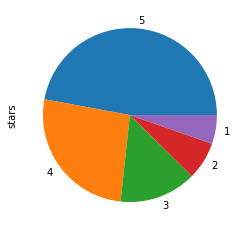

In [25]:
reviews["stars"].value_counts().plot.pie();

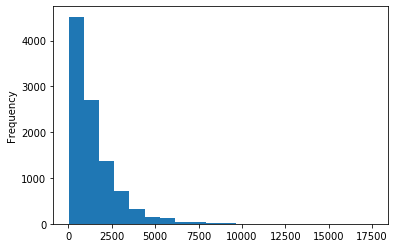

In [26]:
reviews["text"].str.len().plot.hist(bins=20);

## Esercizio 2: Suddivisione in recensioni positive e negative

- Per semplificare l'analisi, riconduciamo i 5 possibili numeri di stelle a due classi
- **(2a)** Aggiungere al frame `reviews` una colonna `label` che associ ad ogni recensione la stringa `"pos"` se ha 4 o 5 stelle, `"neg"` altrimenti
  - consiglio: usare `np.where`
- **(2b)** Visualizzare il numero di valori `"pos"` e `"neg"` nella colonna `label`

In [28]:
reviews["label"] = np.where(reviews["stars"] >= 4, "pos", "neg")

In [29]:
reviews["label"].value_counts()

pos    7328
neg    2672
Name: label, dtype: int64

## Classificazione di testi

- La matrice documenti-termini ha la forma di un dataset
  - ogni riga rappresenta un esempio (un testo) da classificare
  - ogni colonna rappresenta una variabile che caratterizza gli esempi
- Possiamo quindi addestrare un modello di classificazione su tale matrice per stimare l'orientamento delle recensioni
- Iniziamo suddividendo come al solito i dati in training set (70\%) e validation set (30\%)

In [30]:
from sklearn.model_selection import train_test_split
reviews_train, reviews_val = \
    train_test_split(reviews, test_size=0.3, random_state=42)

- Definiamo quindi lo spazio vettoriale in cui rappresentare le recensioni

In [31]:
vect = CountVectorizer()

- Costruiamo lo spazio vettoriale sul training set (quindi con le parole contenute in esso) e otteniamone la matrice documenti-termini

In [32]:
dtm_train = vect.fit_transform(reviews_train["text"])

- Otteniamo uno spazio con tante dimensioni quante le parole distinte nelle recensioni di training, ovvero...

In [33]:
len(vect.get_feature_names())

51772

- Esempi di parole estratte sono...

In [34]:
vect.get_feature_names()[1000:1010]

['abides',
 'abiding',
 'abigail',
 'abilene',
 'abilites',
 'abilities',
 'ability',
 'abit',
 'abition',
 'abject']

- La matrice è estremamente sparsa: la percentuale di termini non 0 è molto bassa

In [35]:
dtm_train

<7000x51772 sparse matrix of type '<class 'numpy.int64'>'
	with 993179 stored elements in Compressed Sparse Row format>

In [36]:
dtm_train.astype(bool).mean()

0.002740529905850931

- Rappresentiamo i documenti del validation set nello stesso spazio vettoriale, ottenendone la corrispondente matrice documenti-termini

In [37]:
dtm_val = vect.transform(reviews_val["text"])

- A questo punto creiamo un modello di classificazione e addestriamolo passando la matrice documenti-termini e le etichette delle recensioni relative al training set
  - usiamo ad es. la regressione logistica

In [38]:
from sklearn.linear_model import LogisticRegression
lrm = LogisticRegression(solver="saga", C=10)
lrm.fit(dtm_train, reviews_train["label"]);

/home/rrobby/.venvs/dia2020/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


- Usando matrice ed etichette del validation set possiamo valutare l'accuratezza del modello

In [39]:
lrm.score(dtm_val, reviews_val["label"])

0.8003333333333333

- Il modello assume `neg` come classe _negativa_ (-1) e `pos` come _positiva_ (1), come si deduce dall'ordine delle due nell'attributo `classes_`

In [40]:
lrm.classes_

array(['neg', 'pos'], dtype=object)

## Esercizio 3: Uso del modello

- Consideriamo il seguente campione di due ipotetiche recensioni da classificare

In [46]:
new_reviews = [
    "What an awesome movie!",
    "It was really boring"
]

- **(3a)** Estrarre la loro rappresentazione nello spazio vettoriale costruito sui documenti di training
- **(3b)** Ottenere le etichette previste dal modello per ciascuna
- **(3c)** Ottenere le distribuzioni di probabilità tra le etichette date dal modello

In [48]:
dtm_new = vect.transform(new_reviews)

In [49]:
lrm.predict(dtm_new)

array(['pos', 'neg'], dtype=object)

In [50]:
lrm.predict_proba(dtm_new)

array([[0.45258018, 0.54741982],
       [0.5482316 , 0.4517684 ]])

## Parametri del modello

- Possiamo accedere ai coefficienti lineari assegnati al modello per ciascuna variabile, ovvero per ciascun termine

In [51]:
lrm.coef_[0, :4]

array([ 0.00114713,  0.00512247,  0.00098072, -0.00018917])

- Possiamo creare una serie che associ a ciascuno di questi coefficienti il termine corrispondente

In [52]:
coefs = pd.Series(lrm.coef_[0], index=vect.get_feature_names())

- Ordinando questa serie in base ai valori, vediamo quali i coefficienti più alti e più bassi e da questi quali parole contribuiscano di più a rendere una recensione positiva o negativa

In [53]:
coefs.sort_values(inplace=True)

- I coefficienti più bassi fanno tendere la decisione alla classe "-1", in questo caso le recensioni negative...

In [54]:
coefs.head(10)

bad       -0.280881
nothing   -0.204097
worst     -0.183564
plot      -0.181789
just      -0.155270
if        -0.151913
boring    -0.137970
decent    -0.134878
but       -0.134054
minutes   -0.133075
dtype: float64

- ...mentre quelli più alti fanno tendere alla classe "1", le positive

In [55]:
coefs.tail(10)

season       0.155841
very         0.166864
you          0.177098
love         0.180012
highly       0.180055
well         0.180152
excellent    0.204934
dvd          0.205746
best         0.213455
great        0.420655
dtype: float64

## Esercizio 4: Pipeline per pre-processing testo e classificazione

- Avendo `CountVectorizer` l'interfaccia standard dei filtri di scikit-learn, possiamo utilizzarlo in una pipeline
- **(4a)** Definire una pipeline con un modello di regressione logistica applicato allo spazio vettoriale creato da un `CountVectorizer`, replicando la configurazione usata sopra
- **(4b)** Addestrare il modello con le recensioni di training
- **(4c)** Ricavare l'accuratezza del modello sulle recensioni di validation
- **(4d)** Stampare le 5 parole con peso maggiore

In [56]:
from sklearn.pipeline import Pipeline

In [58]:
model = Pipeline([
    ("vectorizer", CountVectorizer()),
    ("classifier", LogisticRegression(solver="saga", C=10))
])

In [59]:
model.fit(reviews_train["text"], reviews_train["label"]);

/home/rrobby/.venvs/dia2020/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [60]:
model.score(reviews_val["text"], reviews_val["label"])

0.8006666666666666

In [61]:
pd.Series(
    model.named_steps["classifier"].coef_[0],
    index=model.named_steps["vectorizer"].get_feature_names()
).sort_values().tail(5)

well         0.180423
excellent    0.204059
dvd          0.205393
best         0.213475
great        0.420547
dtype: float64

## tf.idf

- Nella matrice estratta da `CountVectorizer` abbiamo il numero di occorrenze dei termini nei documenti
- Esistono però metodi più avanzati per pesare la rilevanza di ciascun termine in un documento
- È di uso comune il _tf.idf_ (_term frequency-inverse document frequency_), pari al prodotto di due fattori (di cui esistono diverse formulazioni)
  - il _tf_ indica l'**importanza locale** di un termine in un documento ed è pari al numero di occorrenze (o al suo logaritmo)
  - l'_idf_ indica l'**importanza globale** di un termine, tanto più alta quanto più il termine è poco comune nell'insieme complessivo dei documenti
  - comunemente, una volta calcolati tutti i pesi, **ciascun vettore è normalizzato** in modo da avere norma euclidea pari a 1, per appianare differenze di pesi tra documenti più o meno lunghi
- `TfidfVectorizer` è un filtro utilizzabile come alternativa a `CountVectorizer` per estrarre matrici documenti-termini basate sul tf.idf

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

- Calcoliamo ad esempio la matrice dei tf.idf per l'insieme di 4 frasi usate sopra...

In [63]:
vect = TfidfVectorizer()
dtm = vect.fit_transform(docs)
pd.DataFrame(dtm.toarray(), index=docs, columns=vect.get_feature_names())

,and,beautiful,blue,cheese,is,love,sky,so,the
the sky is blue,0.000000,0.000000,0.399210,0.000000,0.488291,0.000000,0.488291,0.00000,0.603137
sky is blue and sky is beautiful,0.440516,0.347308,0.229880,0.000000,0.562351,0.000000,0.562351,0.00000,0.000000
the beautiful sky is so blue,0.000000,0.432026,0.285953,0.000000,0.349762,0.000000,0.349762,0.54797,0.432026
i love blue cheese,0.000000,0.000000,0.346182,0.663385,0.000000,0.663385,0.000000,0.00000,0.000000


- Ad es. nell'ultimo documento "cheese" ha un peso maggiore di "blue" in quanto è una parola meno comune e quindi più discriminante

- Per testare l'uso del tf.idf nel classificatore di recensioni, sostituiamo il `CountVectorizer` con il `TfidfVectorizer`

In [64]:
model = Pipeline([
    ("vectorizer", TfidfVectorizer()),
    ("classifier", LogisticRegression(solver="saga", C=10))
])

- Addestriamo il modello sul training set e valutiamo l'accuratezza sul validation set come sopra

In [65]:
model.fit(reviews_train["text"], reviews_train["label"])
model.score(reviews_val["text"], reviews_val["label"])

0.8256666666666667

## Scomposizione in termini

- I vectorizer (`Count` e `Tfidf`) usano un algoritmo semplice per scomporre le parole nei documenti
- Possiamo anche passare come parametro `tokenizer` una funzione alternativa che prenda in input una stringa e restituisca la lista di "token" (parole) in essa
- Specifichiamo ad esempio di usare il metodo `split` delle stringhe, che suddivide in base agli spazi ignorando i segni di punteggiatura

In [66]:
model = Pipeline([
    ("vectorizer", TfidfVectorizer(tokenizer=str.split)),
    ("classifier", LogisticRegression(solver="saga", C=10))
])
model.fit(reviews_train["text"], reviews_train["label"]);

- Il modello ottenuto può essere leggermente meno preciso per questo

In [67]:
model.score(reviews_val["text"], reviews_val["label"])

0.8093333333333333

## Esercizio 5: Scomposizione in termini con NLTK

- Addestrare sul training set e valutare l'accuratezza sul validation set di un modello basato su tf.idf e regressione logistica simile a quelli sopra, ma che scomponga i documenti in termini usando la funzione `word_tokenize` di scikit-learn

In [69]:
model = Pipeline([
    ("vectorizer", TfidfVectorizer(tokenizer=nltk.word_tokenize)),
    ("classifier", LogisticRegression(solver="saga", C=10))
])
model.fit(reviews_train["text"], reviews_train["label"])
model.score(reviews_val["text"], reviews_val["label"])

0.8246666666666667

## Riduzione della dimensionalità

- Il numero di dimensioni generate considerando tutti i termini distinti presenti in tutti i documenti, come anche visto sopra, è molto alto

In [70]:
len(model.named_steps["vectorizer"].get_feature_names())

73124

- All'aumentare del numero di documenti, una tale quantità di dimensioni può comportare tempi di calcolo e uso di memoria eccessivi
- Esistono però modi per ridurre il numero di dimensioni con effetti minimi sull'accuratezza del modello
- Impostando il parametro `min_df` di `TfidfVectorizer` (o `CountVectorizer`), limitiamo le parole nel dizionario dello spazio vettoriale a quelle presenti in almeno _N_ documenti di training

- Creiamo ad esempio un modello limitato alle parole che appaiono in almeno 3 documenti di training distinti

In [71]:
model = Pipeline([
    ("vectorizer", TfidfVectorizer(min_df=3)),
    ("classifier", LogisticRegression(solver="saga", C=10))
])
model.fit(reviews_train["text"], reviews_train["label"]);

- Il numero di feature è molto inferiore...

In [72]:
len(model.named_steps["vectorizer"].get_feature_names())

21063

- ...ma l'accuratezza è quasi identica

In [73]:
model.score(reviews_val["text"], reviews_val["label"])

0.8226666666666667

## Rimozione stopword

- Sono dette _stopword_ quelle parole che prese da sole non danno alcuna informazione sulla semantica del testo
  - sono stopword ad es. articoli ("le"), preposizioni ("per"), congiunzioni ("ma"), ...
- Nella rappresentazione BOW di documenti è comune rimuovere a priori le stopword, in quanto non informative del contenuto
- Esistono diverse liste di stopword, NLTK ne integra alcune per diverse lingue
- Reperiamo la lista delle stopword inglesi...

In [74]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /home/rrobby/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [75]:
stoplist = nltk.corpus.stopwords.words("english")

- La lista include ad esempio le parole...

In [76]:
stoplist[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

- Nei vectorizer, possiamo configurare una lista di parole da escludere con un parametro `stop_words`
  - di default il valore è `None`: non si usa alcuna stopword

In [77]:
model = Pipeline([
    ("vectorizer", TfidfVectorizer(min_df=3, stop_words=stoplist)),
    ("classifier", LogisticRegression(solver="saga", C=10))
])
model.fit(reviews_train["text"], reviews_train["label"]);

- Rimuovendo le stopword, così come accade impostando `min_df`, otteniamo generalmente una riduzione delle feature con variazioni contenute di accuratezza

In [78]:
len(model.named_steps["vectorizer"].get_feature_names())

20922

In [79]:
model.score(reviews_val["text"], reviews_val["label"])

0.809

## Esercizio 6: Grid search per riduzione dimensionalità

- **(6a)** Eseguire una grid search sul training set con cross validation a 3 fold stratificati per ottimizzare i parametri di un modello basato su tf.idf e regressione logistica simile a quelli sopra con
  - numero minimo di documenti in cui deve apparire una parola pari a 3, 5 o 10
  - nessuna rimozione delle stopword o rimozione delle stopword nella lista `stoplist`
- **(6b)** Valutare l'accuratezza sul validation set del modello con la configurazione migliore individuata dalla grid search

In [80]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [82]:
model = Pipeline([
    ("vectorizer", TfidfVectorizer()),
    ("classifier", LogisticRegression(solver="saga", C=10))
])
grid = {
    "vectorizer__min_df": [3, 5, 10],
    "vectorizer__stop_words": [None, stoplist]
}
skf = StratifiedKFold(3, shuffle=True)
gs = GridSearchCV(model, grid, cv=skf)
gs.fit(reviews_train["text"], reviews_train["label"]);

In [83]:
gs.score(reviews_val["text"], reviews_val["label"])

0.8226666666666667

## n-gram

- Un _n-gram_ è una **sequenza di _n_ parole consecutive** presenti in un testo
  - nei casi più comuni con n pari a 2 o 3 si parla rispettivamente di _bigram_ o _trigram_
  - ad es., nella frase "vado a New York", i bigram sono "vado a", "a New" e "New York"
- Così come le parole singole, anche gli n-gram possono essere usati come **feature per rappresentare i documenti**
  - alcuni n-gram possono essere significativi, rappresentando un termine composto da più parole (es. "New York")
  - ne rimangono però molti senza un significato specifico (es. "a New")

- Impostando in un vectorizer l'attributo `ngram_range` ad una **tupla `(a, b)`**, sono usate come feature le possibili **sequenze contenenti dalle a alle b parole**
  - l'impostazione di default è `(1, 1)`, per cui sono selezionate solo parole singole
  - impostando invece ad es. `(1, 2)` si selezionano sia le parole singole che i bigram
  - introducendo gli n-gram **il numero di termini distinti aumenta di molto**: è importante ridurli specificando un `min_df`

In [84]:
model = Pipeline([
    ("vectorizer", TfidfVectorizer(min_df=3, ngram_range=(1, 2))),
    ("classifier", LogisticRegression(solver="saga", C=10))
])
model.fit(reviews_train["text"], reviews_train["label"]);

In [85]:
len(model.named_steps["vectorizer"].get_feature_names())

100711

In [86]:
model.score(reviews_val["text"], reviews_val["label"])

0.8233333333333334

- I termini estratti includono parole singole e bigram significativi e non

In [87]:
model.named_steps["vectorizer"].get_feature_names()[-15:-5]

['zone and',
 'zone feel',
 'zone the',
 'zones',
 'zoo',
 'zooey',
 'zooey deschanel',
 'zoolander',
 'zoom',
 'zooming']

## POS Tagging

- Ad ogni parola in una frase è associata una **classe grammaticale**, detta _Part of Speech_ (POS)
  - ad alto livello le POS sono **_nome_, _verbo_, _aggettivo_, ecc.**
  - spesso si effettuano ulteriori distinzioni, ad es. nomi singolari e plurali
  - le POS possono includere anche i segni di punteggiatura
- Il _POS tagging_ etichetta ogni token di una sequenza (ottenuta dalla segmentazione) con il suo POS
  - è un processo non banale, in quanto una stessa parola può avere diverse POS a seconda del contesto (es. "letto" può essere nome o verbo)
- La funzione `pos_tag` prende una sequenza di token e restituisce una lista di tuple `(token, tag)`
  - i possibili tag sono elencati quì: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

In [88]:
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/rrobby/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [89]:
tokens = nltk.word_tokenize("This isn't an example, or is it?")
tokens

['This', 'is', "n't", 'an', 'example', ',', 'or', 'is', 'it', '?']

In [90]:
nltk.pos_tag(tokens)

[('This', 'DT'),
 ('is', 'VBZ'),
 ("n't", 'RB'),
 ('an', 'DT'),
 ('example', 'NN'),
 (',', ','),
 ('or', 'CC'),
 ('is', 'VBZ'),
 ('it', 'PRP'),
 ('?', '.')]

## Esercizio 7: Bag of words con POS tagging

- **(7a)** Implementare la funzione `tokenize_with_pos` in modo che, dato un testo, restituisca la lista di tuple `(parola, POS)` come quella sopra
- **(7b)** Addestrare sul training set un modello di classificazione con `TfidfVectorizer` simile a quelli sopra (senza usare gli n-gram), utilizzando la funzione `tokenize_with_pos` per la scomposizione dei documenti in parole
  - le tuple `(parola, POS)` sono accettate come nomi delle feature
- **(7c)** Estrarre il numero di feature generate dal vectorizer
- **(7d)** Valutare sul validation set l'accuratezza del modello

In [93]:
def tokenize_with_pos(text):
    return nltk.pos_tag(nltk.tokenize.word_tokenize(text))

In [94]:
model = Pipeline([
    ("vectorizer", TfidfVectorizer(min_df=3, tokenizer=tokenize_with_pos)),
    ("classifier", LogisticRegression(solver="saga", C=10))
])
model.fit(reviews_train["text"], reviews_train["label"]);

In [95]:
len(model.named_steps["vectorizer"].get_feature_names())

26805

In [96]:
model.score(reviews_val["text"], reviews_val["label"])

0.8156666666666667

## Lemmatizzazione

- Estraendo dai documenti tutte le parole nella forma in cui sono scritte, otteniamo spesso molteplici forme di uno stesso _lemma_ (parola di un vocabolario)
  - es. le parole "estraggo", "estraendo", "estratto", ... sono tutte coniugazioni diverse del verbo "estrarre"
- La _lemmatizzazione_ è il processo che converte ciascuna parola di un testo nel suo lemma
  - nomi al singolare, verbi all'infinito, ...
- In questo modo **raggruppiamo gruppi di termini simili**, riducendo la dimensionalità dello spazio senza perdita di informazione rilevante
- Per eseguire la lemmatizzazione in NLTK creiamo un oggetto `WordNetLemmatizer`
  - dobbiamo scaricare la base di conoscenza WordNet, che include le informazioni necessarie

In [97]:
nltk.download("wordnet")
wnl = nltk.stem.WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /home/rrobby/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


- Per lemmatizzare una parola si usa il metodo `lemmatize`, passandone anche il POS
  - i POS possibili sono: n=nome, v=verbo, a=aggettivo, r=avverbio

In [98]:
# esempio: nome con plurale regolare
wnl.lemmatize("words", "n")

'word'

In [99]:
# esempio: nome con plurale irregolare
wnl.lemmatize("mice", "n")

'mouse'

In [100]:
# esempio: verbo con forma passata irregolare
wnl.lemmatize("went", "v")

'go'

- Creiamo una funzione che segmenti le parole di un testo eseguendo la lemmatizzazione dove possibile
  - creiamo un dizionario con le corrispondenze tra le prime lettere dei POS in Penn Treebank visti sopra e questi

In [101]:
penn_to_wn = {"N": "n", "V": "v", "J": "a", "R": "r"}
def tokenize_with_lemmatization(text):
    return [(wnl.lemmatize(token, penn_to_wn[tag[0]]) if tag[0] in penn_to_wn else token)
            for token, tag in nltk.pos_tag(nltk.tokenize.word_tokenize(text))]

In [102]:
tokenize_with_lemmatization("We have shown many examples!")

['We', 'have', 'show', 'many', 'example', '!']

- La funzione ha estratto le parole, ma portando il verbo "show" e il nome "example" alle forme base

- Usiamo la funzione come `tokenizer` per la creazione dello spazio vettoriale

In [103]:
model = Pipeline([
    ("vectorizer", TfidfVectorizer(min_df=3, tokenizer=tokenize_with_lemmatization)),
    ("classifier", LogisticRegression(solver="saga", C=10))
])
model.fit(reviews_train["text"], reviews_train["label"]);

- Anche in questo modo otteniamo un numero di feature inferiore, tuttavia il tempo impiegato per il processamento del testo è elevato

In [104]:
len(model.named_steps["vectorizer"].get_feature_names())

18170

In [105]:
model.score(reviews_val["text"], reviews_val["label"])

0.822

## Stemming

- Un algoritmo di _stemming_ estrae da una parola la sua **radice morfologica**
- Al contrario di un lemma, la radice di una parola può non essere di senso compiuto
- Termini diversi (anche come lemma) possono avere la stessa radice
- Ciònonostante, lo stemming è spesso usato come **alternativa alla lemmatizzazione**, in quanto
  - lemmi con la stessa radice sono spesso correlati (es. nome "pesce" e verbo "pescare")
  - lo stemming non richiede il POS tagging ed è più efficiente
- NLTK integra diversi algoritmi di stemming, tra cui ad es. `PorterStemmer`

In [106]:
ps = nltk.stem.PorterStemmer()
ps.stem("lemmatization"), ps.stem("lemmatizer"), ps.stem("lemmatize")

('lemmat', 'lemmat', 'lemmat')

## Esercizio 8: Bag of words con stemming

- **(8a)** Implementare la funzione `tokenize_with_stemming` in modo che, dato un testo, restituisca la lista di parole in esso con stemming applicato
- **(8b)** Addestrare sul training set un modello di classificazione con `TfidfVectorizer` simile a quelli sopra (senza usare gli n-gram), utilizzando la funzione `tokenize_with_stemming` per la scomposizione dei documenti in parole
- **(8c)** Estrarre il numero di feature generate dal vectorizer
- **(8d)** Valutare sul validation set l'accuratezza del modello

In [109]:
def tokenize_with_stemming(text):
    return [ps.stem(token) for token
            in nltk.word_tokenize(text)]
    # oppure: return list(map(ps.stem, nltk.word_tokenize(text)))

In [110]:
model = Pipeline([
    ("vectorizer", TfidfVectorizer(min_df=3, tokenizer=tokenize_with_stemming)),
    ("classifier", LogisticRegression(solver="saga", C=10))
])
model.fit(reviews_train["text"], reviews_train["label"]);

In [111]:
len(model.named_steps["vectorizer"].get_feature_names())

15947

In [112]:
model.score(reviews_val["text"], reviews_val["label"])

0.823

## Sentiment Analysis in NLTK

- La stima dell'orientamento positivo o negativo di opinioni scritte è un problema molto comune
- Per questo esistono modelli preaddestrati, tra cui [_VADER_](https://www.aaai.org/ocs/index.php/ICWSM/ICWSM14/paper/viewPaper/8109) (_Valence Aware Dictionary and sEntiment Reasoner_)
- NLTK permette di utilizzare VADER per valutare l'orientamento di opinioni, senza bisogno di addestrare modelli
- Per usare VADER, scarichiamo i dati necessari e creiamo un oggetto `SentimentIntensityAnalyzer`

In [113]:
nltk.download("vader_lexicon")
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/rrobby/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


- VADER si basa su un insieme di regole e su un dizionario (_lexicon_), che associa ad ogni parola un punteggio che ne denota la valenza positiva o negativa
- Oltre a parole della lingua inglese, il dizionario prevede anche termini abbreviati, slang e emoticon

In [114]:
vader.lexicon["excellent"]

2.7

In [115]:
vader.lexicon["sux"]

-1.5

In [116]:
vader.lexicon["n00b"]

-1.6

In [117]:
vader.lexicon[":)"]

2.0

- Per stimare la polarità di una frase, usiamo il metodo `polarity_scores`

In [118]:
vader.polarity_scores("What an awesome movie!")

{'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'compound': 0.6588}

In [119]:
vader.polarity_scores("It was really boring")

{'neg': 0.464, 'neu': 0.536, 'pos': 0.0, 'compound': -0.3804}

- I valori `pos`, `neg` e `neu` valutano quanto la frase sia positiva, negativa o neutra
- `compound` è un'aggregazione dei tre punteggi e riassume la polarità della frase
- Se abbiamo una recensione completa, possiamo usare la funzione `sent_tokenize` di NLTK per scomporla in singole frasi valutabili con VADER.

In [120]:
nltk.sent_tokenize("Nice movie! Actors were really good. Excellent!")

['Nice movie!', 'Actors were really good.', 'Excellent!']

## Esercizio 9: Utilizzo di VADER come modello di classificazione

- **(9a)** Implementare la funzione `label_review` in modo che
  - scomponga il testo di una recensione data in frasi
  - estragga per ogni frase il punteggio _compound_ dato da VADER
  - restituisca `"pos"` se la somma dei punteggi è positiva, `"neg"` altrimenti
- **(9b)** Usare la funzione per estrarre una sequenza (lista, array o serie) delle classi previste da VADER per le recensioni del validation set
- **(9c)** Usare la funzione `accuracy_score(classi_reali, classi_predette)` di scikit-learn per calcolare l'accuratezza delle predizioni
  - l'accuratezza può risultare inferiore rispetto ai modelli sopra, in quanto questi ultimi sono addestrati specificamente sulle nostre recensioni mentre VADER è più orientato ai tweet

In [121]:
from sklearn.metrics import accuracy_score

In [123]:
def label_review(review):
    sentences = nltk.sent_tokenize(review)
    scores = list(map(vader.polarity_scores, sentences))
    return "pos" if sum(s["compound"] for s in scores) >= 0 else "neg"

In [124]:
vader_preds = [label_review(review) for review in reviews_val["text"]]

In [125]:
accuracy_score(reviews_val["label"], vader_preds)

0.7303333333333333